In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
# Read data
df = pd.read_csv("train.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,281,336,99,3.880098,1.797502,3.252475,12.131981,3.091361,5.630319,4.466373,2.511203,5.982724,4.541159,12.740476,12.634929,4.050294,11.827245,3.568321,13.420537,8.251807,2.287900,14.834430,0.082253,2.975561,5.223753,1.212287,7.302797,7.083149,3.610350,7.767512,7.829657,8.395356,1.583711,10.125020,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,109,123,130,12.099770,10.670550,14.137111,0.217037,1.426881,0.916617,8.168254,0.432319,5.872218,10.401401,12.843301,7.529992,12.525335,8.655344,8.499587,5.602552,4.187738,13.205982,5.432667,12.379275,11.938420,6.057282,2.581280,11.785456,4.445564,11.141346,0.839731,1.481908,8.920653,4.450379,10.584802,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,488,138,80,2.947479,12.671352,13.279918,13.163338,9.051826,11.605822,11.094161,10.461813,9.827713,2.206019,9.914789,4.448482,8.864810,10.837476,14.167872,13.456857,14.855511,7.596095,4.928033,2.439930,6.791165,8.709536,1.363087,4.980975,2.182372,14.673614,8.083289,6.601472,6.789200,12.982035,10.273114,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,111,38,177,5.368252,6.765946,0.544415,7.175573,14.515096,1.901743,9.231263,9.600810,10.058844,5.680021,8.238473,0.272760,11.892743,4.030567,14.946749,7.121632,6.507572,12.462688,12.222522,0.318528,5.350321,3.143358,10.291804,13.105170,10.159100,3.671488,11.087198,1.289054,0.249375,2.967133,6.885179,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,141,417,343,14.592218,6.483629,9.159313,5.083046,8.772015,7.687242,11.106926,13.926358,0.914295,1.418124,4.504223,6.158475,1.790923,7.049614,14.409808,11.615837,5.675790,9.136146,10.640432,14.051122,2.240417,3.271828,5.061455,3.679880,2.948615,6.419577,14.873100,14.806887,9.992545,3.701959,11.162686,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304


In [9]:
# Check for missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       90000 non-null  int64  
 1   1       90000 non-null  int64  
 2   2       90000 non-null  int64  
 3   3       90000 non-null  int64  
 4   4       90000 non-null  int64  
 5   5       90000 non-null  int64  
 6   6       90000 non-null  float64
 7   7       90000 non-null  float64
 8   8       90000 non-null  int64  
 9   9       90000 non-null  int64  
 10  10      90000 non-null  int64  
 11  11      90000 non-null  int64  
 12  12      90000 non-null  int64  
 13  13      90000 non-null  float64
 14  14      90000 non-null  float64
 15  15      90000 non-null  float64
 16  16      90000 non-null  float64
 17  17      90000 non-null  float64
 18  18      90000 non-null  float64
 19  19      90000 non-null  float64
 20  20      90000 non-null  float64
 21  21      90000 non-null  float64
 22

In [11]:
# See summary statistics
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,target
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,249.423944,250.236267,248.637289,249.736600,249.436178,249.656167,-0.011402,0.498548,0.499189,249.842033,249.818967,249.346778,249.899900,7.483940,7.498037,7.496259,7.501635,7.486463,7.523043,7.475585,7.494835,7.503939,7.507724,7.508681,7.472421,7.519205,7.515753,7.509402,7.496781,7.504014,7.494212,7.490808,7.486936,7.514508,7.491614,7.520193,7.507801,7.493713,7.513840,7.507033,7.479579,7.519826,7.502483,7.512965,7.475155,7.523962,7.508397,7.473322,7.490658,7.474578,7.509206,7.487159,7.513316,50.033981
std,144.336393,144.022200,144.107577,144.284945,143.941581,144.329168,7.038171,0.288682,0.500002,144.612718,144.363827,144.476128,144.310495,4.330908,4.318388,4.338732,4.345618,4.318031,4.323500,4.327327,4.325447,4.330159,4.332599,4.328966,4.345228,4.339104,4.333907,4.331007,4.334982,4.318553,4.327286,4.322672,4.329524,4.329973,4.333144,4.335244,4.329515,4.327480,4.333543,4.327670,4.326175,4.315565,4.333881,4.329929,4.330410,4.321537,4.331761,4.335692,4.332122,4.323035,4.326364,4.324876,4.333080,28.897243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.949874,0.000014,0.000000,0.000000,0.000000,0.000000,0.000000,0.000095,0.000252,0.000190,0.000192,0.000067,0.000229,0.000125,0.000382,0.000398,0.000140,0.000382,0.000129,0.000192,0.000017,0.000080,0.000161,0.000437,0.000041,0.000070,0.000074,0.000111,0.000067,0.000078,0.000018,0.000094,0.000020,0.000106,0.000105,0.000273,0.000315,0.000060,0.000019,0.000040,0.000154,0.000083,0.000367,0.000014,0.000160,0.000147,0.000125,0.002634
25%,125.000000,126.000000,124.000000,125.000000,125.000000,124.000000,-7.071068,0.248932,0.000000,124.000000,126.000000,124.000000,125.000000,3.723392,3.763626,3.718755,3.719537,3.758746,3.778857,3.733780,3.748951,3.760261,3.742810,3.768145,3.685140,3.760790,3.746467,3.772795,3.741697,3.774239,3.743116,3.763061,3.750034,3.778028,3.743842,3.752848,3.776405,3.755325,3.754465,3.771945,3.731527,3.784809,3.763004,3.768044,3.707544,3.797002,3.760627,3.715721,3.739358,3.715298,3.773381,3.743536,3.776322,25.091903
50%,250.000000,251.000000,248.000000,250.000000,250.000000,250.000000,0.000000,0.497136,0.000000,250.000000,250.000000,249.000000,251.000000,7.483265,7.505267,7.502682,7.515240,7.467721,7.539462,7.460267,7.481500,7.521563,7.520793,7.520739,7.484349,7.526894,7.528984,7.494876,7.491009,7.500083,7.514475,7.483334,7.458614,7.513794,7.475324,7.550623,7.484699,7.472789,7.518614,7.504101,7.452493,7.532363,7.511806,7.507058,7.474127,7.533987,7.505259,7.459774,7.494167,7.477270,7.512575,7.476564,7.506812,50.030705
75%,374.000000,375.000000,374.000000,375.000000,373.000000,374.000000,7.000000,0.747513,1.000000,376.000000,375.000000,375.000000,375.000000,11.242883,11.228331,11.258049,11.284618,11.238904,11.254751,11.211187,11.238128,11.248749,11.244657,11.240915,11.239795,11.276738,11.272683,11.271486,11.257988,11.233189,11.223296,11.229486,11.245719,11.272623,11.241922,11.261178,11.255442,11.251097,11.270277,11.241504,11.222543,11.241135,11.255483,11.272459,11.216585,11.276349,11.261971,11.215637,11.239232,11.210070,11.268156,11.234414,11.277835,75.059454
max,499.000000,499.000000,499.000000,499.00000

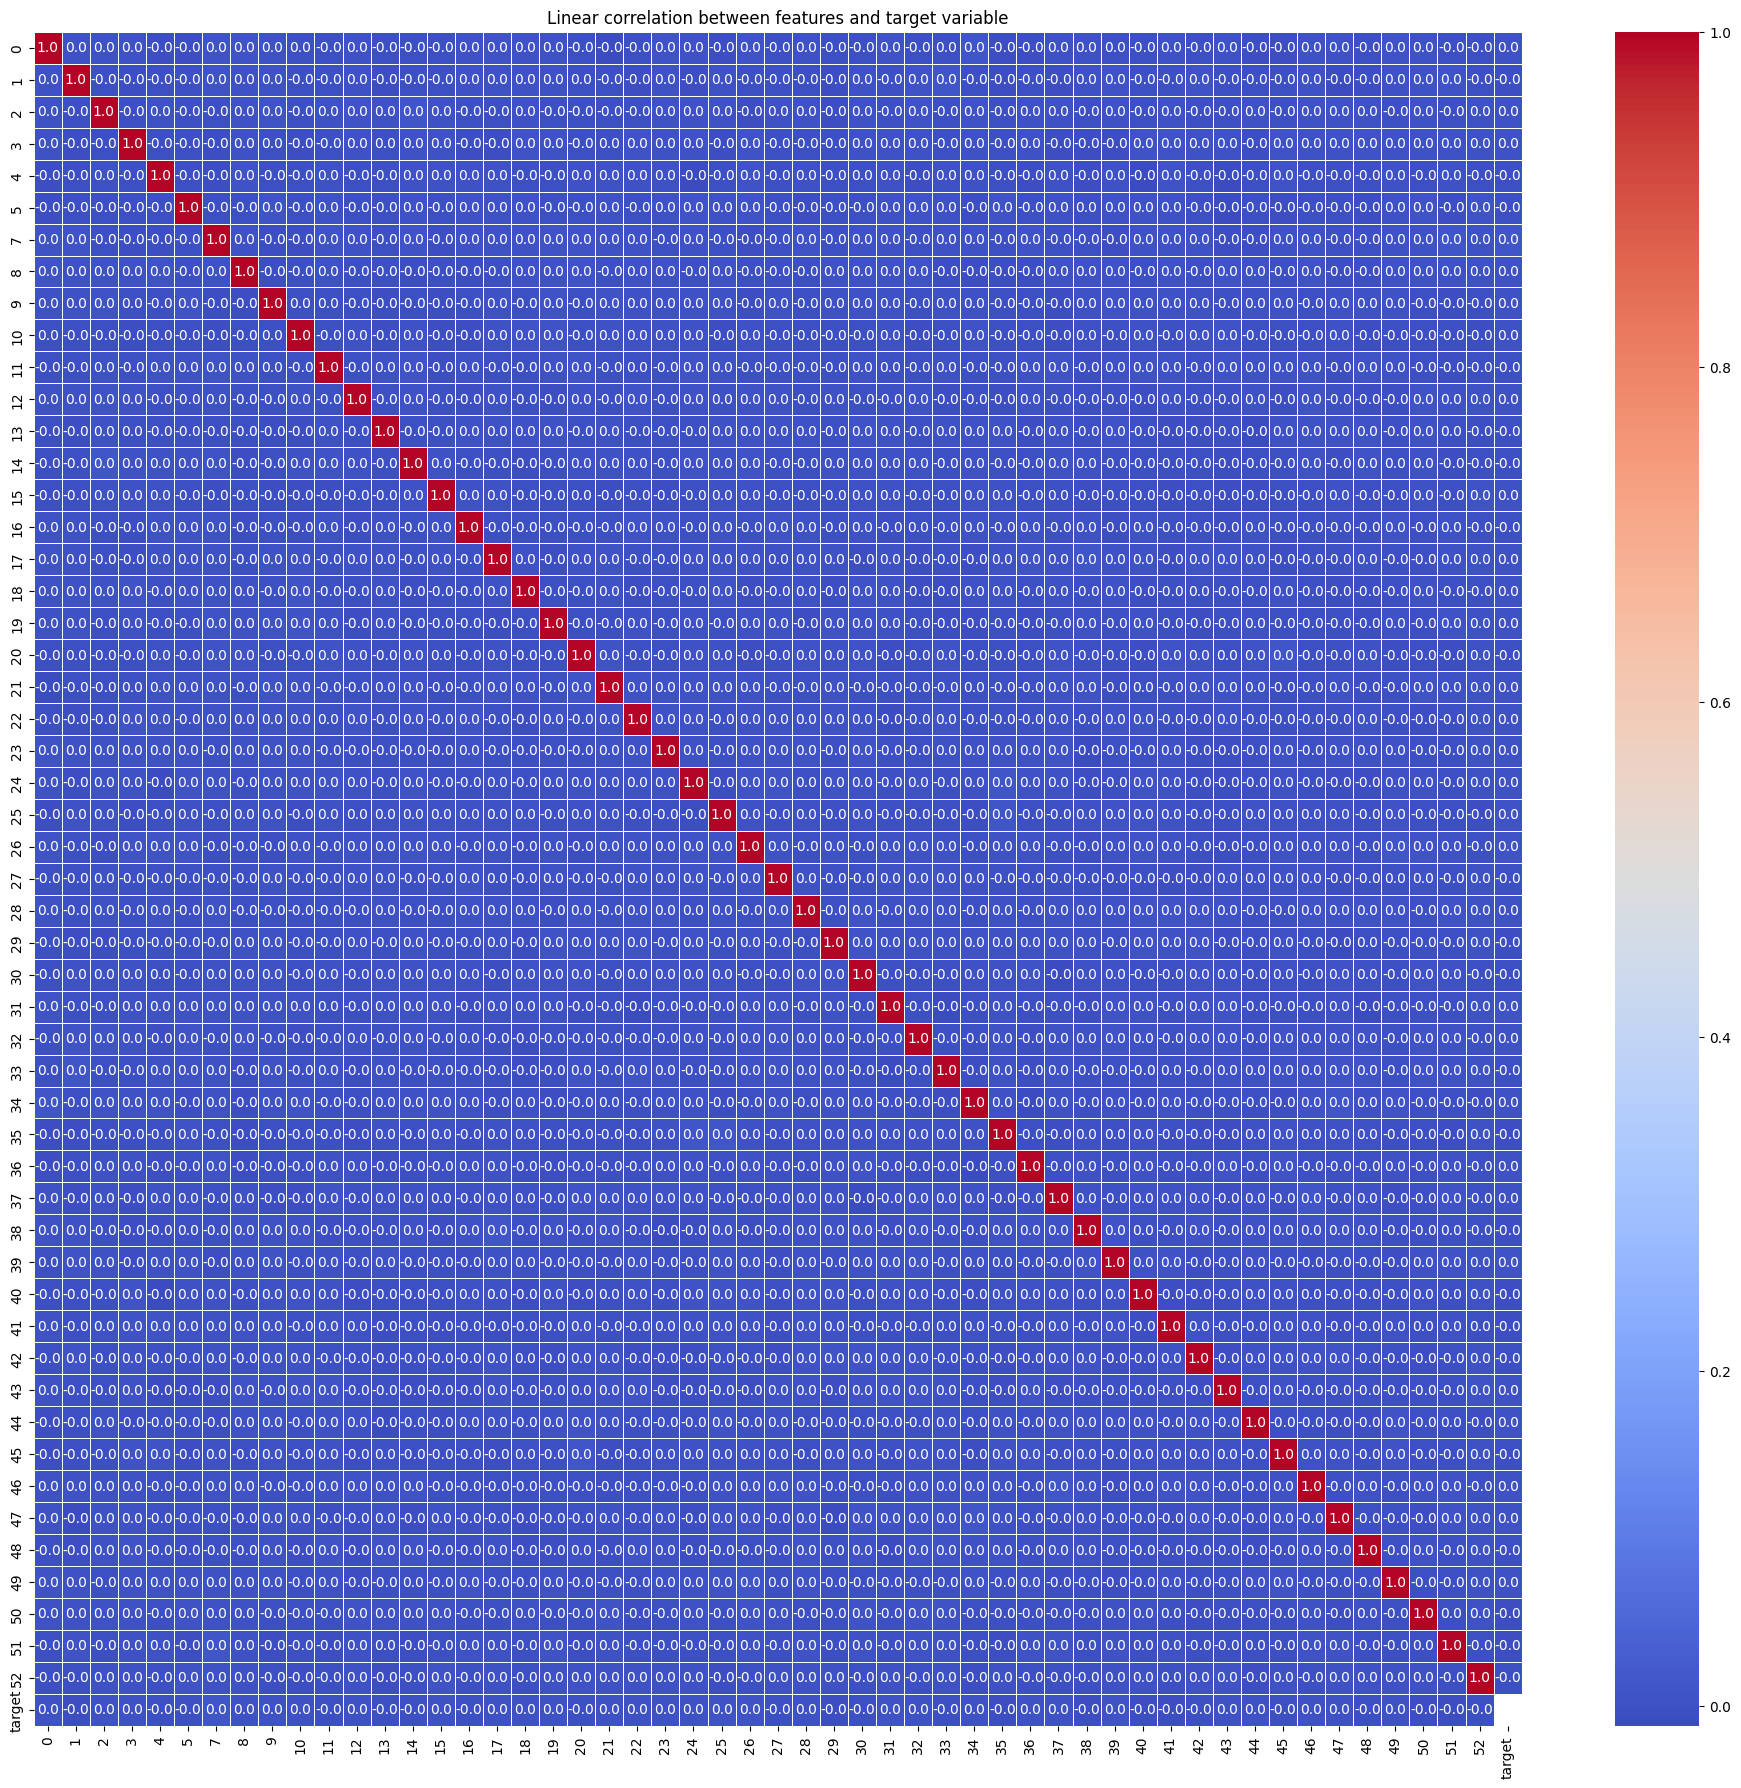

In [8]:
def correlation_heatmap(df: pd.DataFrame, target_column: str):
    """
    Visualize the linear correlation between features and the target variable as a heatmap.

    Args:
    - df (DataFrame): The DataFrame containing both features and the target variable.
    - target_column (str): The name of the target variable column.
    """

    # Compute the correlation matrix excluding the target column
    correlation_matrix = df.drop(columns=[target_column]).corr()

    # Get correlation of features with the target variable
    correlation_with_target = df.corr()[target_column].drop(target_column)

    # Insert correlation values between target column and other features into the diagonal positions
    correlation_matrix[target_column] = correlation_with_target
    correlation_matrix.loc[target_column] = correlation_with_target  # Target column's correlation with itself

    # Plot heatmap
    plt.figure(figsize=(24, 22))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)
    plt.title("Linear correlation between features and target variable")
    plt.show()

correlation_heatmap(df, 'target')

In [3]:
# Features 6 and 8 are highly correlated, we can drop one of them
df = df.drop('6', axis = 1)

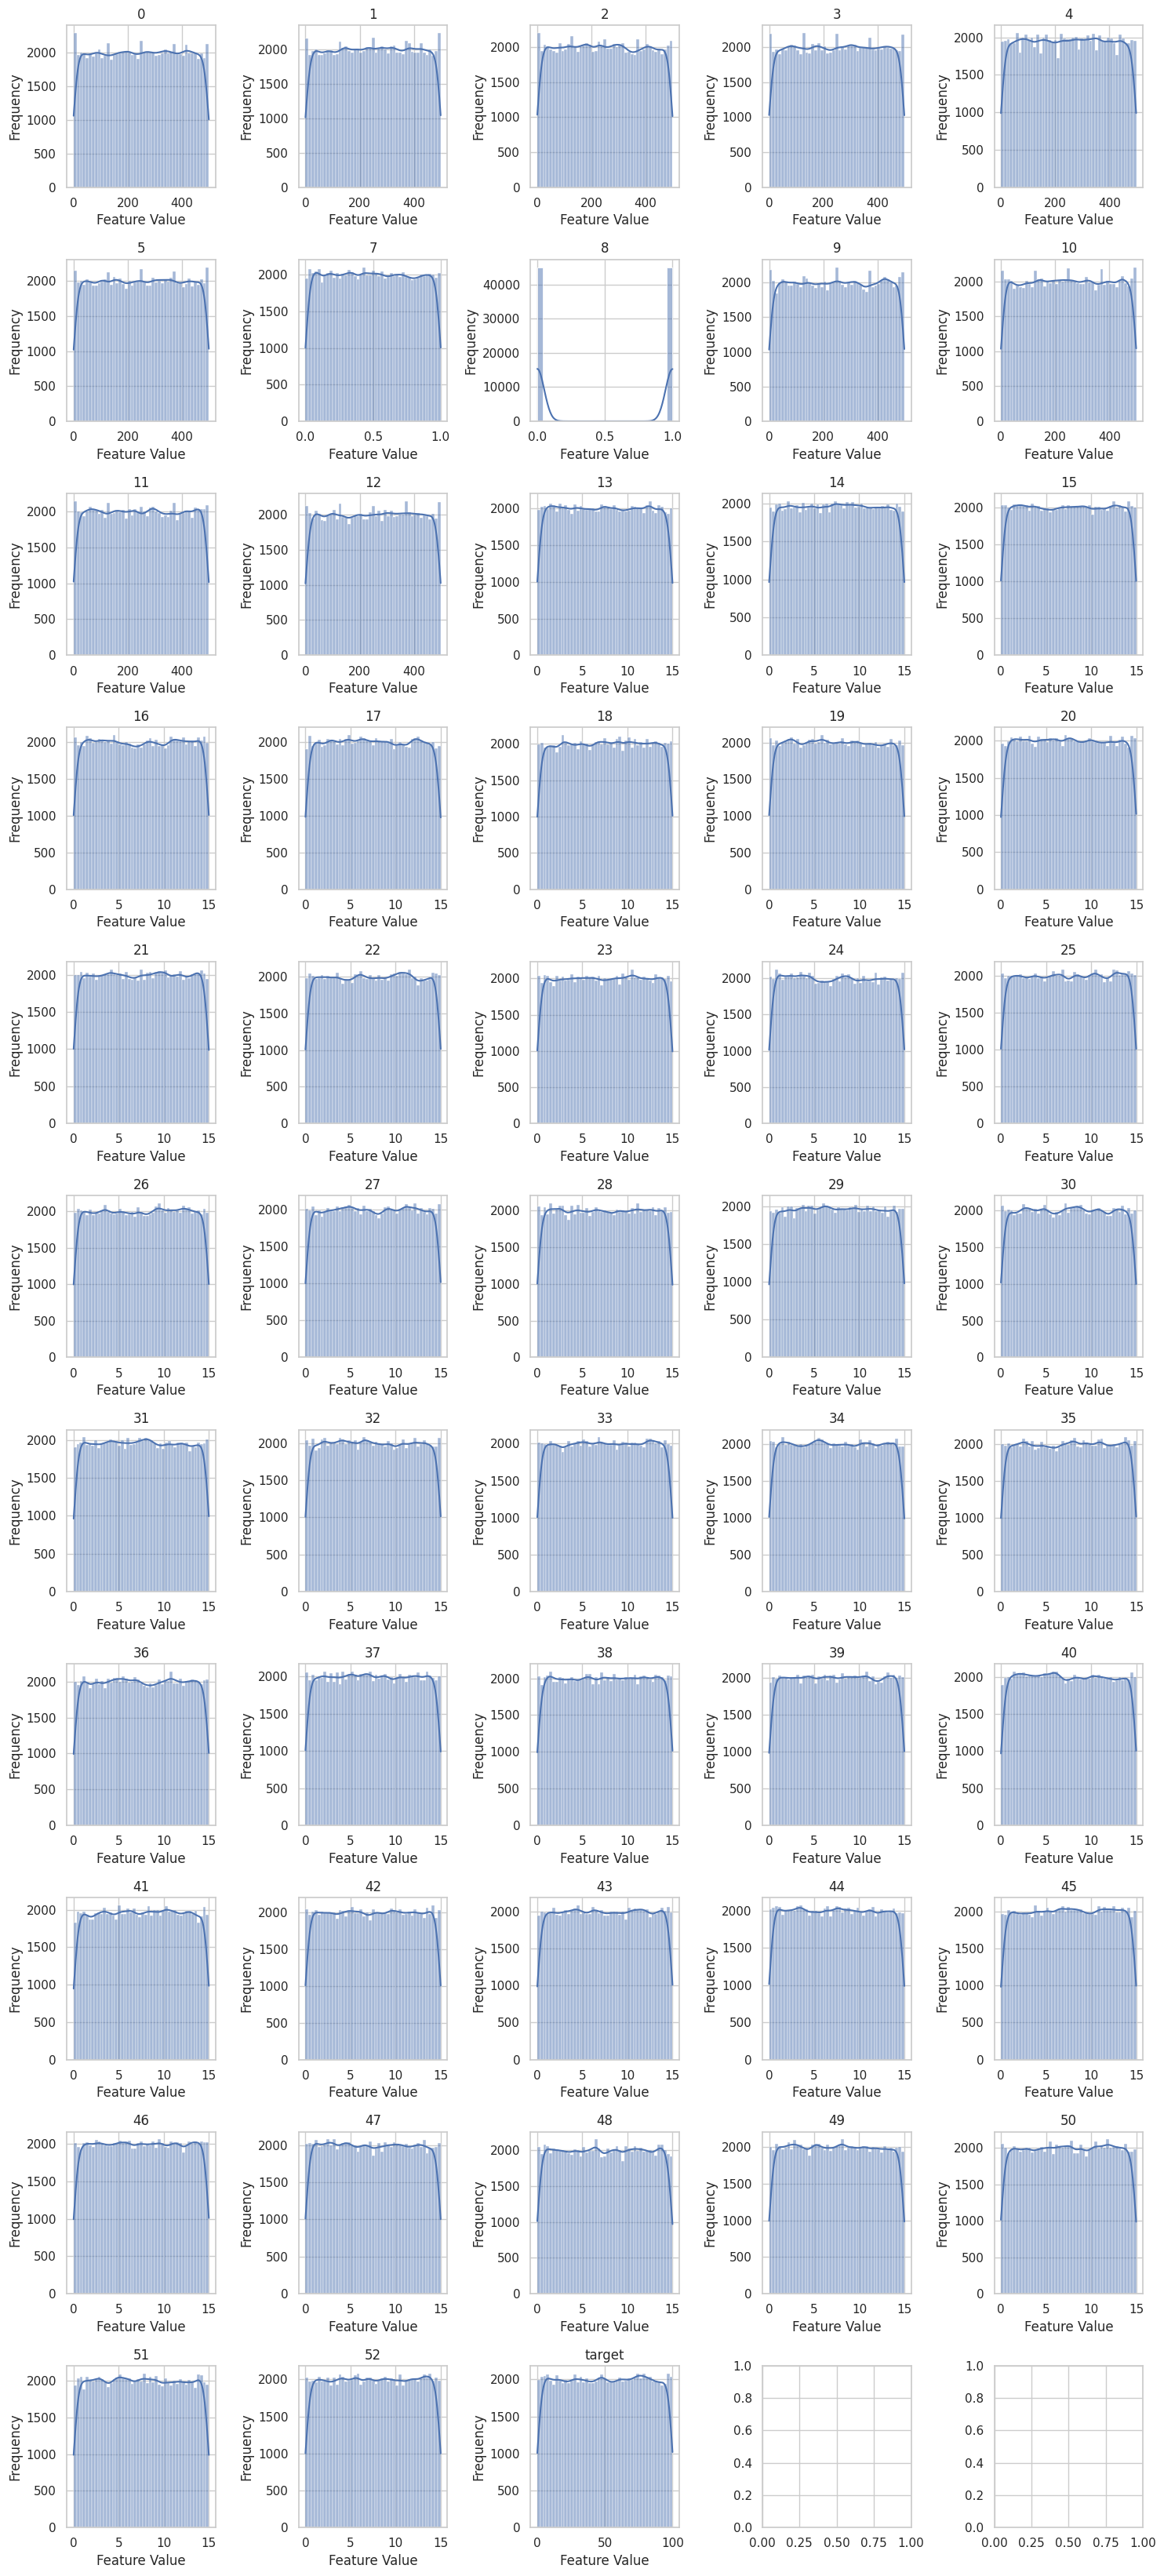

In [31]:
# Plot features distribution

import math
num_features = len(df.columns)
num_rows = math.ceil(num_features / 5)
num_cols = min(5, num_features)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3*num_rows))

# Plot distribution of features
for i, column in enumerate(df.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]
    sns.histplot(df[column], kde=True, ax=ax)
    ax.set_title(column)
    ax.set_xlabel("Feature Value")
    ax.set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()

#### Feature '8' has only 2 unique values - 0 and 1

In [39]:
# Check non linear correlation
def drop_highly_correlated_features(df: pd.DataFrame, threshold_corr: float = 0.8):
    """
    Drop features that are highly correlated with other features based on the Spearman correlation matrix.

    Args:
    - df (DataFrame): The DataFrame containing features.
    - threshold_corr (float): The threshold value for identifying highly correlated features based on the Spearman correlation coefficient. Default is 0.5.

    Returns:
    - df_filtered (DataFrame): The DataFrame with highly correlated features dropped.
    """

    # Compute the Spearman correlation matrix between features
    spearman_corr_matrix = df.corr(method='spearman')

    # Find highly correlated pairs of features
    highly_correlated_pairs = []
    for i in range(len(spearman_corr_matrix.columns)):
        for j in range(i+1, len(spearman_corr_matrix.columns)):
            if abs(spearman_corr_matrix.iloc[i, j]) > threshold_corr:
                highly_correlated_pairs.append((spearman_corr_matrix.columns[i], spearman_corr_matrix.columns[j]))

    # Identify features to drop
    features_to_drop = set()
    for feature1, feature2 in highly_correlated_pairs:
        features_to_drop.add(feature1)
        features_to_drop.add(feature2)

    return features_to_drop

correlated_features = drop_highly_correlated_features(df)
correlated_features

# There is no highly correlated features left

set()

In [4]:
# Check for outliers
def drop_outliers(df: pd.DataFrame, threshold: float = 2.0):
    """
    Drop outliers from a DataFrame based on specified columns and threshold.

    Args:
    - df (DataFrame): The DataFrame containing the data.
    - columns (list): A list of column names to consider for outlier detection.
    - threshold (float): The threshold value for identifying outliers. Default is 2.0, representing 2 standard deviations.

    Returns:
    - df_filtered (DataFrame): The DataFrame with outliers removed.
    """

    df_filtered = df.copy()
    columns = df_filtered.drop('target', axis = 1).columns.to_list()
    rows_dropped = 0

    # Iterate over specified columns
    for column in columns:
        # Calculate the mean and standard deviation of the column
        mean = df[column].mean()
        std = df[column].std()

        # Define the upper and lower bounds for outlier detection
        lower_bound = mean - threshold * std
        upper_bound = mean + threshold * std

        # Count rows that will be dropped
        rows_dropped += len(df_filtered[(df_filtered[column] < lower_bound) | (df_filtered[column] > upper_bound)])

        # Drop rows where the values fall outside the specified range
        df_filtered = df_filtered[(df_filtered[column] >= lower_bound) & (df_filtered[column] <= upper_bound)]

    print(f"Number of rows to be dropped due to outliers: {rows_dropped}")

    return df_filtered

df_clean = drop_outliers(df)

Number of rows to be dropped due to outliers: 0


In [56]:
# delete old df
del df

#### Modeling

In [5]:
# Split data on features and target
X = df_clean.drop('target', axis = 1).copy()
y = df_clean['target']

In [6]:
def select_and_evaluate_model(X, y, test_size = 0.2, cv = 5):
    """
    Select and evaluate multiple regression models using cross-validation.

    Args:
    - X (DataFrame): The feature matrix.
    - y (Series): The target variable.
    - test_size (float): The proportion of the dataset to include in the test split.
    - cv (int): Number of folds in cross-validation.

    Returns:
    - None
    """
    # Split the data into train and test sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Initialize models
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge': Ridge(),
        'Lasso': Lasso(),
        'ElasticNet': ElasticNet(),
        # 'Random Forest': RandomForestRegressor(),
        'KNN': KNeighborsRegressor(),
        'LightGBM': lgb.LGBMRegressor()
    }

    # Evaluate each model
    for model_name, model in models.items():
        # Perform cross-validation
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='neg_root_mean_squared_error')
        cv_rmse = -cv_scores

        # Fit the model on the training data
        model.fit(X_train_scaled, y_train)

        # Make predictions on training, validation, and test sets
        train_predictions = model.predict(X_train_scaled)
        val_predictions = model.predict(X_val_scaled)

        # Compute RMSE for training, validation, and test sets
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))

        # Print model performance
        print(f"Model: {model_name}")
        print(f"CV RMSE: {cv_rmse.mean():.2f} +/- {cv_rmse.std():.2f}")
        print(f"Train RMSE: {train_rmse:.2f}")
        print(f"Validation RMSE: {val_rmse:.2f}")
        print("-----------------------------------------")

In [7]:
select_and_evaluate_model(X, y)

Model: Linear Regression
CV RMSE: 28.88 +/- 0.03
Train RMSE: 28.86
Validation RMSE: 29.02
-----------------------------------------
Model: Ridge
CV RMSE: 28.88 +/- 0.03
Train RMSE: 28.86
Validation RMSE: 29.02
-----------------------------------------
Model: Lasso
CV RMSE: 28.87 +/- 0.02
Train RMSE: 28.87
Validation RMSE: 29.00
-----------------------------------------
Model: ElasticNet
CV RMSE: 28.87 +/- 0.02
Train RMSE: 28.87
Validation RMSE: 29.00
-----------------------------------------
Model: KNN
CV RMSE: 31.63 +/- 0.10
Train RMSE: 25.79
Validation RMSE: 31.75
-----------------------------------------
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009659 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12991
[LightGBM] [Info] Number of data points in the train set: 57600, number of used features: 52
[LightGBM] [Info] Start training from score 50.142732
[LightGBM] [Info] Auto-choosing col-wise 

In [14]:
# Hyperparameters tuning

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

param_grid = {
    'alpha': np.arange(0.1, 20, 0.1)
}

# Initialize Lasso model
lasso = Lasso()

# Perform GridSearchCV to tune hyperparameters
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its hyperparameters
best_lasso = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']

# Print the best hyperparameters
print("Best alpha:", best_alpha)

# Evaluate the best model on test and train data
train_predictions = best_lasso.predict(X_train_scaled)
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
print("Train RMSE:", train_rmse)

test_predictions = best_lasso.predict(X_val_scaled)
test_rmse = mean_squared_error(y_val, test_predictions, squared=False)
print("Test RMSE:", test_rmse)

Best alpha: 0.2
Train RMSE: 28.867672721273596
Test RMSE: 29.003717522868598


/home/vlas/Downloads/Test Task_DS Engineer/test_task/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/vlas/Downloads/Test Task_DS Engineer/test_task/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


##### Lasso and ElasticNet are winners (without tuning parameters and selecting features). I choose Lasso, as it provides a more straightforward interpretation of the non-zero coefficients and typically produces a sparser model with fewer non-zero coefficients compared to Elastic Net.

##### The hyperparameter optimization didn't give a significant improvement in model performance. There is no need to add this step to 'train.py' for now (save time)

#### Potential improvements in model performance: 
##### Try different models, use feature selection methods.